In [ ]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded =  files.upload()

Saving NSL_KDD_chi2_15.csv to NSL_KDD_chi2_15.csv


In [ ]:
df = pd.read_csv('NSL_KDD_chi2_15.csv')
df.head()

,duration,service,flag,src_bytes,dst_bytes,logged_in,lnum_compromised,lnum_root,count,serror_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,dst_host_serror_rate,dst_host_srv_serror_rate,labels
0,0,20,9,491,0,0,0,0,2,0.0,0.0,150,25,0.00,0.00,1
1,0,44,9,146,0,0,0,0,13,0.0,0.0,255,1,0.00,0.00,1
2,0,49,5,0,0,0,0,0,123,1.0,1.0,255,26,1.00,1.00,0
3,0,24,9,232,8153,1,0,0,5,0.2,0.2,30,255,0.03,0.01,1
4,0,24,9,199,420,1,0,0,30,0.0,0.0,255,255,0.00,0.00,1


In [ ]:
X = df.drop('labels', axis = 1)
y = df['labels']
X.shape, y.shape

((148517, 15), (148517,))

In [ ]:
# to devide the data set into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103961, 15), (44556, 15), (103961,), (44556,))

## **classification / supervised learning**

Classification Models

In [ ]:
rf = RandomForestClassifier()

RF with TTS

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred,  average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [ ]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     21443
           1       0.99      1.00      1.00     23113

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21302   141]
 [   76 23037]]


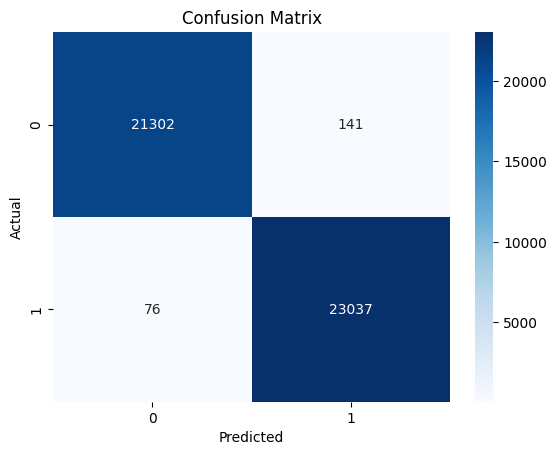

In [ ]:
# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()